# ANÁLISE DATA HACKERS 2024-2025

> Script de limpeza e tratamento do dataset sobre a pesquisa de mercado de dados realizado pela Data Hackers, presente no [kaggle](https://www.kaggle.com/datasets/datahackers/state-of-data-brazil-20242025/data).

## 1) Imports

In [45]:
# Import de bibliotecas
import pandas as pd
import missingno as msno
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub
import os


# Import dos dados do Kaggle
path = kagglehub.dataset_download("datahackers/state-of-data-brazil-20242025")
df = pd.read_csv(path + "/Final Dataset - State of Data 2024 - Kaggle - df_survey_2024.csv", low_memory=False)
df.head()


,0.a_token,0.d_data/hora_envio,1.a_idade,1.a.1_faixa_idade,1.b_genero,1.c_cor/raca/etnia,1.d_pcd,1.e_experiencia_profissional_prejudicada,1.e.1_Não acredito que minha experiência profissional seja afetada,"1.e.2_Sim, devido a minha Cor/Raça/Etnia",...,"8.d.3_Entrando em contato com os times de negócio para definição do problema, identificar a solução e apresentação de resultados.",8.d.4_Desenvolvendo modelos de Machine Learning com o objetivo de colocar em produção em sistemas (produtos de dados).,"8.d.5_Colocando modelos em produção, criando os pipelines de dados, APIs de consumo e monitoramento.","8.d.6_Cuidando da manutenção de modelos de Machine Learning já em produção, atuando no monitoramento, ajustes e refatoração quando necessário.","8.d.7_Realizando construções de dashboards em ferramentas de BI como PowerBI, Tableau, Looker, Qlik, etc.","8.d.8_Utilizando ferramentas avançadas de estatística como SAS, SPSS, Stata etc, para realizar análises.","8.d.9_Criando e dando manutenção em ETLs, DAGs e automações de pipelines de dados.",8.d.10_Criando e gerenciando soluções de Feature Store e cultura de MLOps.,"8.d.11_Criando e mantendo a infra que meus modelos e soluções rodam (clusters, servidores, API, containers, etc.)",8.d.12_Treinando e aplicando LLM's para solucionar problemas de negócio.
0,reb94rv0msth7q4nreb94riaq80iz3yi,16/10/2024 11:19:17,18,17-21,Masculino,Branca,Não,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1zc66g69jjt49y32l1zc66g8wqj79m4e,16/10/2024 20:45:31,18,17-21,Masculino,Branca,Não,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,uu99wmam4n5kc2uu99wmydf0rk7l58f7,17/10/2024 18:10:59,18,17-21,Masculino,Parda,Não,Não acredito que minha experiência profissiona...,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3ynsw7z0hl5hhpbfvaeqk73ynsw7z04l,22/10/2024 18:03:00,18,17-21,Masculino,Branca,Não,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,v6bji2ct5xckpl1uouv6bjiotkrf3b4f,23/10/2024 01:33:23,18,17-21,Masculino,Branca,Não,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


> Como o conjunto de dados possui uma grande quantidade de colunas, devemos particioná-lo de forma a definir colunas úteis com base em cada agrupamento funcional de conjunto de features.

## 2) Tratamento

### Particionamento dos dados

In [46]:
# Função para particionar com base nos 8 grupos de atributos
def particionar_df(dataframe, num_partes=8):
    dataframes = []
    for i in range(1, num_partes + 1):
        # Pega as colunas que começam com o número i + as que começam com '0'
        colunas = [col for col in dataframe.columns if col.startswith(str(i)) or col.startswith('0')]
        df_parte = dataframe[colunas]
        dataframes.append(df_parte)
    return dataframes

parte1, parte2, parte3, parte4, parte5, parte6, parte7, parte8 = particionar_df(df)

> Neste caso, conforme a própria [documentação](https://www.kaggle.com/datasets/datahackers/state-of-data-brazil-20242025/data), muitas das 400 colunas originais vieram de perguntas com múltiplas alternativas, convertidas via **one hot encoding**

> Se faz necessária a análise das partições para seleção de colunas úteis para restrição do escopo

### Separando colunas úteis das partições

In [47]:
colunas_uteis = ['0.a_token']

#### Parte 1

In [48]:
parte1.info()
colunas_uteis_parte1 = [
    '1.a_idade', '1.b_genero', '1.c_cor/raca/etnia', '1.d_pcd',
    '1.i.1_uf_onde_mora', '1.g_vive_no_brasil','1.h_pais_onde_mora',
    '1.l_nivel_de_ensino', '1.m_área_de_formação'
]
colunas_uteis.append(colunas_uteis_parte1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5217 entries, 0 to 5216
Data columns (total 33 columns):
 #   Column                                                                                                     Non-Null Count  Dtype  
---  ------                                                                                                     --------------  -----  
 0   0.a_token                                                                                                  5217 non-null   object 
 1   0.d_data/hora_envio                                                                                        5217 non-null   object 
 2   1.a_idade                                                                                                  5217 non-null   int64  
 3   1.a.1_faixa_idade                                                                                          5217 non-null   object 
 4   1.b_genero                                                              

#### Parte 2

In [49]:
parte2.info()
colunas_uteis_parte2 = [
    '2.a_situação_de_trabalho', '2.b_setor', '2.f_cargo_atual',
    '2.g_nivel', '2.h_faixa_salarial', '2.i_tempo_de_experiencia_em_dados',
    '2.r_modelo_de_trabalho_atual', '2.s_modelo_de_trabalho_ideal'
]
colunas_uteis.append(colunas_uteis_parte2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5217 entries, 0 to 5216
Data columns (total 42 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   0.a_token                                                      5217 non-null   object 
 1   0.d_data/hora_envio                                            5217 non-null   object 
 2   2.a_situação_de_trabalho                                       5217 non-null   object 
 3   2.b_setor                                                      4863 non-null   object 
 4   2.c_numero_de_funcionarios                                     4863 non-null   object 
 5   2.d_atua_como_gestor                                           4863 non-null   object 
 6   2.e_cargo_como_gestor                                          1045 non-null   object 
 7   2.f_cargo_atual                                             

#### Parte 3

In [50]:
parte3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5217 entries, 0 to 5216
Data columns (total 61 columns):
 #   Column                                                                              Non-Null Count  Dtype  
---  ------                                                                              --------------  -----  
 0   0.a_token                                                                           5217 non-null   object 
 1   0.d_data/hora_envio                                                                 5217 non-null   object 
 2   3.a_numero_de_pessoas_em_dados                                                      1045 non-null   object 
 3   3.b_cargos_no_time_de_dados_da_empresa                                              1015 non-null   object 
 4   3.b.1_Analytics Engineer                                                            1015 non-null   float64
 5   3.b.2_Engenharia de Dados/Data Engineer                                             1015 non-null

#### Parte 4

In [51]:
parte4.info(verbose=bool)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5217 entries, 0 to 5216
Data columns (total 118 columns):
 #    Column                                                                                       Dtype  
---   ------                                                                                       -----  
 0    0.a_token                                                                                    object 
 1    0.d_data/hora_envio                                                                          object 
 2    4.a_funcao_de_atuacao                                                                        object 
 3    4.a.1_atuacao_em_dados                                                                       object 
 4    4.b_fontes_de_dados_(dia_a_dia)                                                              object 
 5    4.b.1_Dados relacionais (estruturados em bancos SQL)                                         float64
 6    4.b.2_Dados armazenados em ban

#### Parte 5

In [52]:
parte5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5217 entries, 0 to 5216
Data columns (total 6 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   0.a_token                               5217 non-null   object
 1   0.d_data/hora_envio                     5217 non-null   object
 2   5.a_objetivo_na_area_de_dados           541 non-null    object
 3   5.b_oportunidade_buscada                286 non-null    object
 4   5.c_tempo_em_busca_de_oportunidade      290 non-null    object
 5   5.d_experiencia_em_processos_seletivos  289 non-null    object
dtypes: object(6)
memory usage: 244.7+ KB


#### Parte 6

In [53]:
parte6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5217 entries, 0 to 5216
Data columns (total 49 columns):
 #   Column                                                                                                                                   Non-Null Count  Dtype  
---  ------                                                                                                                                   --------------  -----  
 0   0.a_token                                                                                                                                5217 non-null   object 
 1   0.d_data/hora_envio                                                                                                                      5217 non-null   object 
 2   6.a_rotina_como_de                                                                                                                       929 non-null    object 
 3   6.a.1_Desenvolvo pipelines de dados utilizando linguagens 

#### Parte 7

In [54]:
parte7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5217 entries, 0 to 5216
Data columns (total 53 columns):
 #   Column                                                                                                                            Non-Null Count  Dtype  
---  ------                                                                                                                            --------------  -----  
 0   0.a_token                                                                                                                         5217 non-null   object 
 1   0.d_data/hora_envio                                                                                                               5217 non-null   object 
 2   7.a_rotina_como_da                                                                                                                1669 non-null   object 
 3   7.a.1_Processo e analiso dados utilizando linguagens de programação como Python, R etc.      

#### Parte 8

In [55]:
parte8.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5217 entries, 0 to 5216
Data columns (total 55 columns):
 #   Column                                                                                                                                                                                               Non-Null Count  Dtype  
---  ------                                                                                                                                                                                               --------------  -----  
 0   0.a_token                                                                                                                                                                                            5217 non-null   object 
 1   0.d_data/hora_envio                                                                                                                                                                                  5217 non-null

In [56]:
colunas_uteis

['0.a_token',
 ['1.a_idade',
  '1.b_genero',
  '1.c_cor/raca/etnia',
  '1.d_pcd',
  '1.i.1_uf_onde_mora',
  '1.g_vive_no_brasil',
  '1.h_pais_onde_mora',
  '1.l_nivel_de_ensino',
  '1.m_área_de_formação'],
 ['2.a_situação_de_trabalho',
  '2.b_setor',
  '2.f_cargo_atual',
  '2.g_nivel',
  '2.h_faixa_salarial',
  '2.i_tempo_de_experiencia_em_dados',
  '2.r_modelo_de_trabalho_atual',
  '2.s_modelo_de_trabalho_ideal']]

> Optamos por não fazer um maior tratamento das colunas oriundas de one hot encoding, coletando apenas dados daquelas com respostas prontas

### Selecionando colúnas para AED posterior:

In [57]:
# Função flatten
def flatten(lista):
    resultado = []
    for item in lista:
        if isinstance(item, list):
            resultado.extend(flatten(item))  # recursivo
        else:
            resultado.append(item)
    return resultado

# Deixando lista flatten
colunas_uteis = flatten(colunas_uteis)
colunas_uteis

['0.a_token',
 '1.a_idade',
 '1.b_genero',
 '1.c_cor/raca/etnia',
 '1.d_pcd',
 '1.i.1_uf_onde_mora',
 '1.g_vive_no_brasil',
 '1.h_pais_onde_mora',
 '1.l_nivel_de_ensino',
 '1.m_área_de_formação',
 '2.a_situação_de_trabalho',
 '2.b_setor',
 '2.f_cargo_atual',
 '2.g_nivel',
 '2.h_faixa_salarial',
 '2.i_tempo_de_experiencia_em_dados',
 '2.r_modelo_de_trabalho_atual',
 '2.s_modelo_de_trabalho_ideal']

In [58]:
# Conjunto de dados apenas com colunas separadas
dados = df[colunas_uteis].copy()
dados.head()

,0.a_token,1.a_idade,1.b_genero,1.c_cor/raca/etnia,1.d_pcd,1.i.1_uf_onde_mora,1.g_vive_no_brasil,1.h_pais_onde_mora,1.l_nivel_de_ensino,1.m_área_de_formação,2.a_situação_de_trabalho,2.b_setor,2.f_cargo_atual,2.g_nivel,2.h_faixa_salarial,2.i_tempo_de_experiencia_em_dados,2.r_modelo_de_trabalho_atual,2.s_modelo_de_trabalho_ideal
0,reb94rv0msth7q4nreb94riaq80iz3yi,18,Masculino,Branca,Não,RS,True,NaN,Estudante de Graduação,Computação / Engenharia de Software / Sistemas...,Estagiário,Marketing,Analista de Dados/Data Analyst,Júnior,de R$ 1.001/mês a R$ 2.000/mês,de 1 a 2 anos,Modelo 100% remoto,Modelo híbrido flexível (o funcionário tem lib...
1,1zc66g69jjt49y32l1zc66g8wqj79m4e,18,Masculino,Branca,Não,SC,True,NaN,Estudante de Graduação,Computação / Engenharia de Software / Sistemas...,Estagiário,Finanças ou Bancos,Analista de BI/BI Analyst,Júnior,Menos de R$ 1.000/mês,Menos de 1 ano,Modelo 100% presencial,Modelo 100% presencial
2,uu99wmam4n5kc2uu99wmydf0rk7l58f7,18,Masculino,Parda,Não,SP,True,NaN,Estudante de Graduação,Computação / Engenharia de Software / Sistemas...,Empregado (CLT),Indústria,Outra Opção,Júnior,de R$ 1.001/mês a R$ 2.000/mês,Não tenho experiência na área de dados,Modelo 100% presencial,Modelo híbrido com dias fixos de trabalho pres...
3,3ynsw7z0hl5hhpbfvaeqk73ynsw7z04l,18,Masculino,Branca,Não,SP,True,NaN,Estudante de Graduação,Computação / Engenharia de Software / Sistemas...,Estagiário,Tecnologia/Fábrica de Software,Analista de Dados/Data Analyst,Júnior,de R$ 1.001/mês a R$ 2.000/mês,Menos de 1 ano,Modelo híbrido flexível (o funcionário tem lib...,Modelo híbrido flexível (o funcionário tem lib...
4,v6bji2ct5xckpl1uouv6bjiotkrf3b4f,18,Masculino,Branca,Não,SP,True,NaN,Estudante de Graduação,Computação / Engenharia de Software / Sistemas...,Estagiário,Tecnologia/Fábrica de Software,Desenvolvedor/ Engenheiro de Software/ Analist...,Júnior,de R$ 1.001/mês a R$ 2.000/mês,Menos de 1 ano,Modelo 100% remoto,Modelo híbrido flexível (o funcionário tem lib...


### Renomeando colunas:

In [59]:
# Renomeando colunas:
nomes_renomeados = {
    '0.a_token': 'token',
    '1.a_idade': 'idade',
    '1.b_genero': 'genero',
    '1.c_cor/raca/etnia': 'raca_cor_etnia',
    '1.d_pcd': 'pcd',
    '1.i.1_uf_onde_mora': 'uf_onde_mora',
    '1.g_vive_no_brasil': 'vive_no_brasil',
    '1.h_pais_onde_mora': 'pais_onde_mora',
    '1.l_nivel_de_ensino': 'nivel_de_ensino',
    '1.m_área_de_formação': 'area_de_formacao',
    '2.a_situação_de_trabalho': 'situacao_de_trabalho',
    '2.b_setor': 'setor',
    '2.f_cargo_atual': 'cargo_atual',
    '2.g_nivel': 'nivel_profissional',
    '2.h_faixa_salarial': 'faixa_salarial',
    '2.i_tempo_de_experiencia_em_dados': 'tempo_experiencia_dados',
    '2.r_modelo_de_trabalho_atual': 'modelo_trabalho_atual',
    '2.s_modelo_de_trabalho_ideal': 'modelo_trabalho_ideal'
}
dados.rename(columns=nomes_renomeados, inplace=True)
dados.head()

,token,idade,genero,raca_cor_etnia,pcd,uf_onde_mora,vive_no_brasil,pais_onde_mora,nivel_de_ensino,area_de_formacao,situacao_de_trabalho,setor,cargo_atual,nivel_profissional,faixa_salarial,tempo_experiencia_dados,modelo_trabalho_atual,modelo_trabalho_ideal
0,reb94rv0msth7q4nreb94riaq80iz3yi,18,Masculino,Branca,Não,RS,True,NaN,Estudante de Graduação,Computação / Engenharia de Software / Sistemas...,Estagiário,Marketing,Analista de Dados/Data Analyst,Júnior,de R$ 1.001/mês a R$ 2.000/mês,de 1 a 2 anos,Modelo 100% remoto,Modelo híbrido flexível (o funcionário tem lib...
1,1zc66g69jjt49y32l1zc66g8wqj79m4e,18,Masculino,Branca,Não,SC,True,NaN,Estudante de Graduação,Computação / Engenharia de Software / Sistemas...,Estagiário,Finanças ou Bancos,Analista de BI/BI Analyst,Júnior,Menos de R$ 1.000/mês,Menos de 1 ano,Modelo 100% presencial,Modelo 100% presencial
2,uu99wmam4n5kc2uu99wmydf0rk7l58f7,18,Masculino,Parda,Não,SP,True,NaN,Estudante de Graduação,Computação / Engenharia de Software / Sistemas...,Empregado (CLT),Indústria,Outra Opção,Júnior,de R$ 1.001/mês a R$ 2.000/mês,Não tenho experiência na área de dados,Modelo 100% presencial,Modelo híbrido com dias fixos de trabalho pres...
3,3ynsw7z0hl5hhpbfvaeqk73ynsw7z04l,18,Masculino,Branca,Não,SP,True,NaN,Estudante de Graduação,Computação / Engenharia de Software / Sistemas...,Estagiário,Tecnologia/Fábrica de Software,Analista de Dados/Data Analyst,Júnior,de R$ 1.001/mês a R$ 2.000/mês,Menos de 1 ano,Modelo híbrido flexível (o funcionário tem lib...,Modelo híbrido flexível (o funcionário tem lib...
4,v6bji2ct5xckpl1uouv6bjiotkrf3b4f,18,Masculino,Branca,Não,SP,True,NaN,Estudante de Graduação,Computação / Engenharia de Software / Sistemas...,Estagiário,Tecnologia/Fábrica de Software,Desenvolvedor/ Engenheiro de Software/ Analist...,Júnior,de R$ 1.001/mês a R$ 2.000/mês,Menos de 1 ano,Modelo 100% remoto,Modelo híbrido flexível (o funcionário tem lib...


### Dados Nulos

In [60]:
# Exibindo colunas com dados nulos
nulos = dados.isnull().sum()
nulos_df = pd.DataFrame({'Coluna': nulos.index, 'Quantidade de Nulos': nulos.values})
nulos_df['Percentual(%)'] = nulos_df['Quantidade de Nulos'] / len(dados) * 100
nulos_df.sort_values(by='Percentual(%)', ascending=False).reset_index(drop=True)

,Coluna,Quantidade de Nulos,Percentual(%)
0,pais_onde_mora,5078,97.335634
1,nivel_profissional,1399,26.816178
2,cargo_atual,1399,26.816178
3,setor,354,6.785509
4,faixa_salarial,354,6.785509
5,modelo_trabalho_ideal,354,6.785509
6,tempo_experiencia_dados,354,6.785509
7,modelo_trabalho_atual,354,6.785509
8,uf_onde_mora,142,2.721871
9,area_de_formacao,94,1.801802


<Axes: >

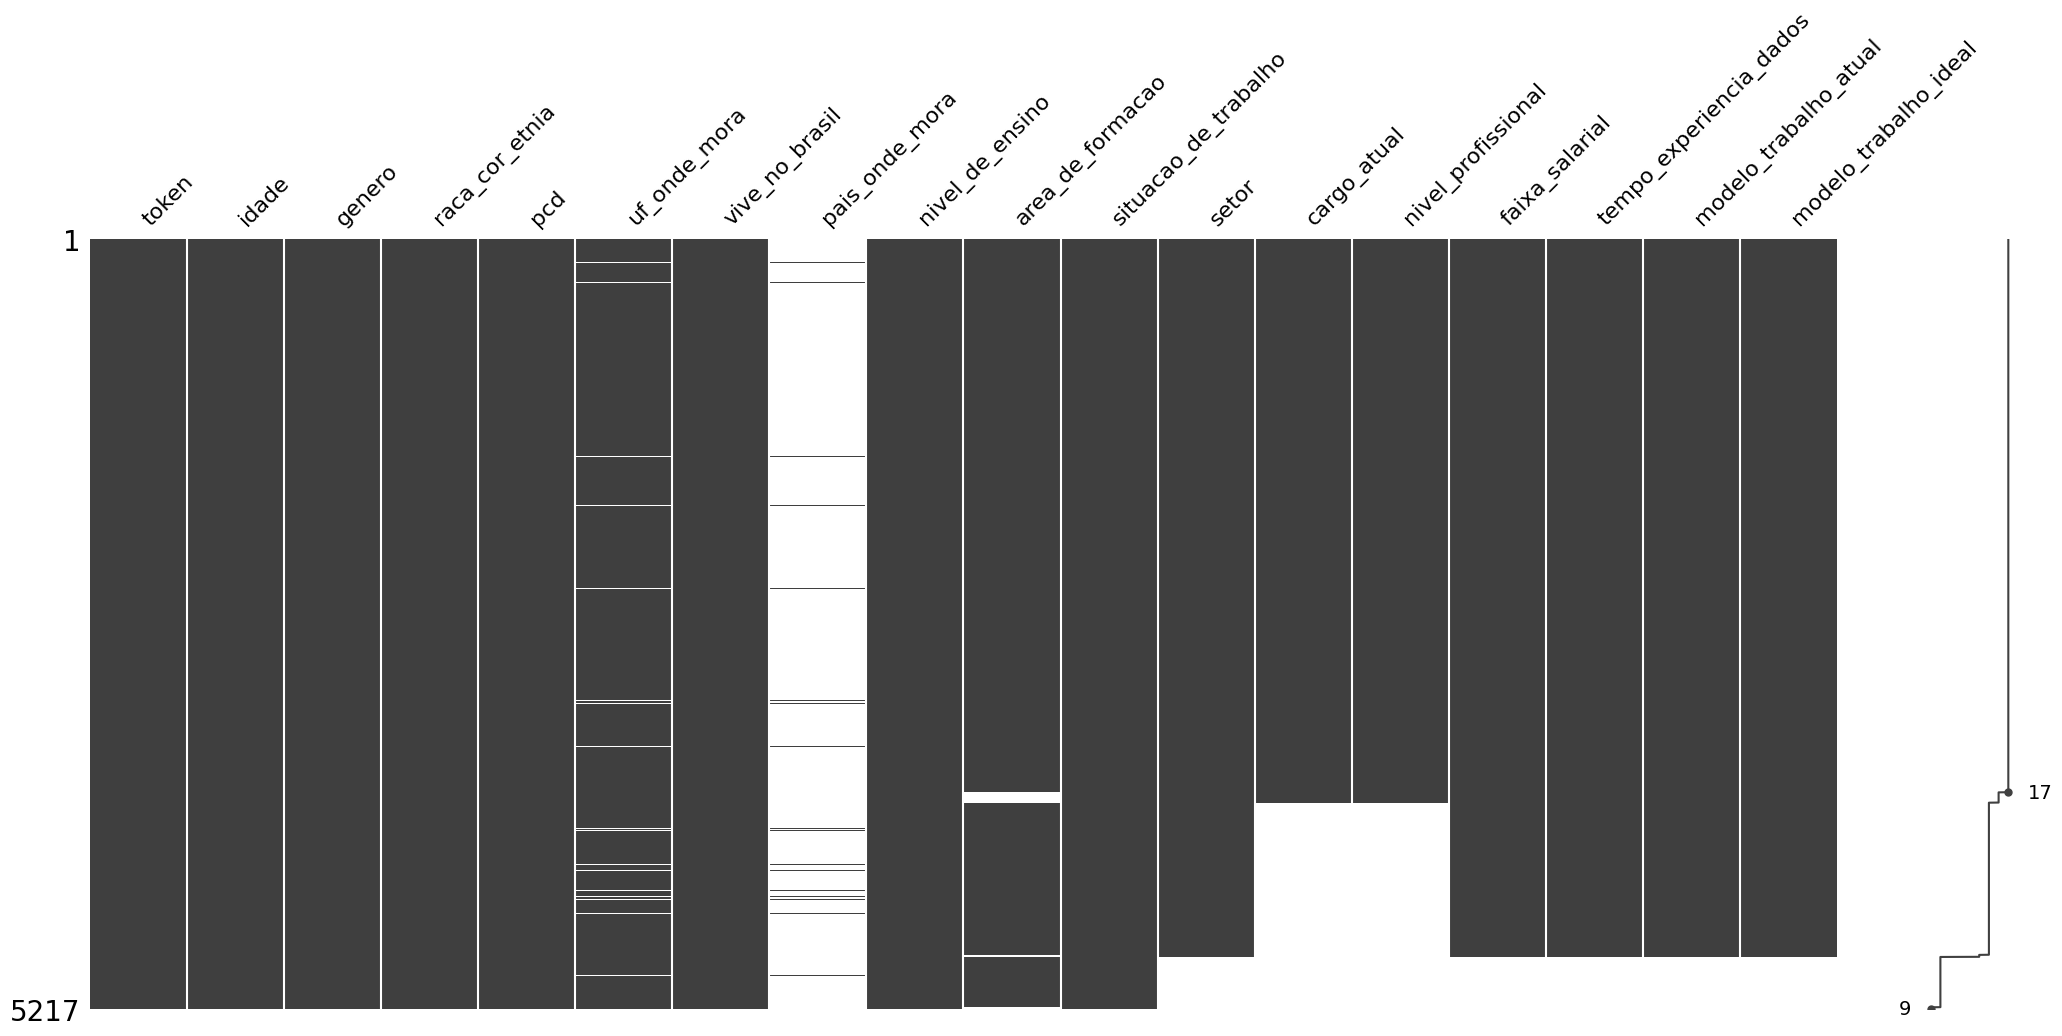

In [61]:
# Gráfico de nulos
filtered_data = msno.nullity_sort(dados, sort='descending')
msno.matrix(filtered_data)

> A maior quantidade de dados nulos está presente na coluna 'pais_onde_mora', que parece ter dados nulos altamente correlacionados com a coluna de 'uf_onde_mora'

> É demonstrada a possibilidade de correlação forte e direta entre 'setor' com 'modelo_trabalho_ideal', 'modelo_trabalho_atual', 'tempo_experiencia_dados', 'faixa_salarial', em que é provável que sempre que um esteja nulo, o outro também.

<Axes: >

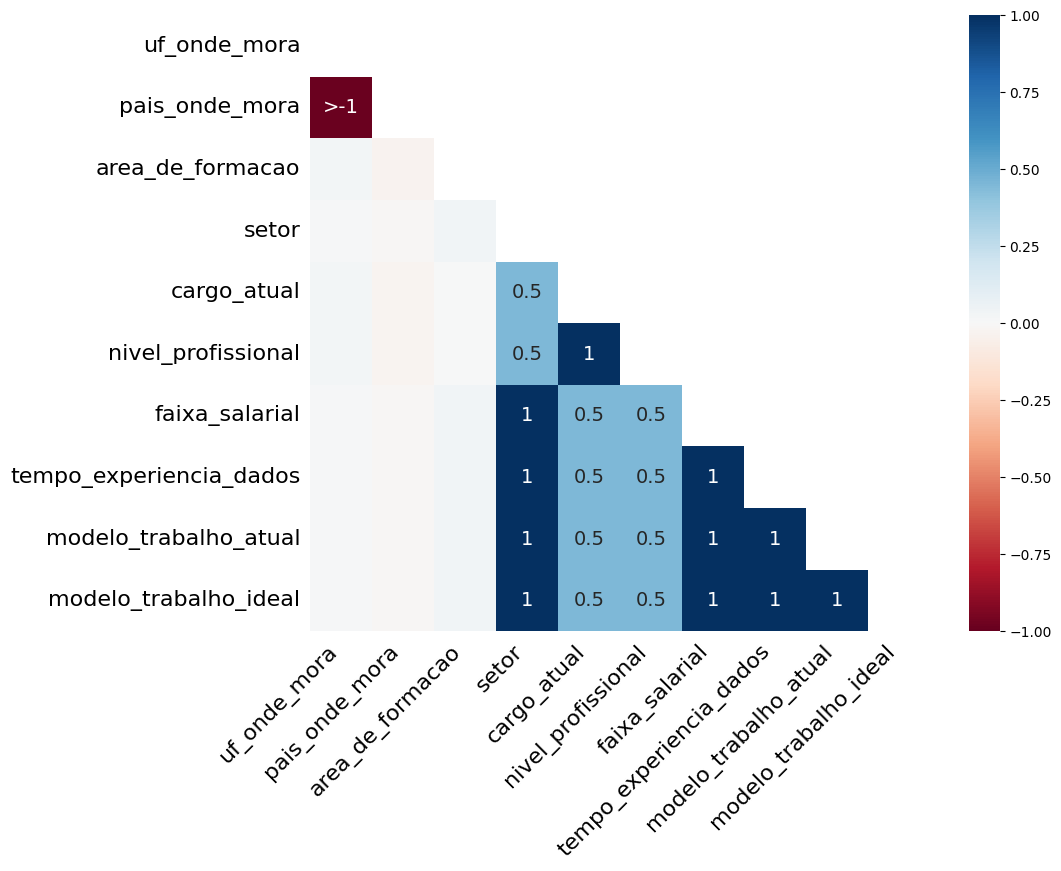

In [62]:
# Heatmap
msno.heatmap(dados, figsize=(10,8))

##### Hipótese sobre 'uf_onde_mora', 'vive_no_brasil', 'pais_onde_mora'
- Há a hipótese que os dados das 3 colunas estejam correlacionados:
- Ex1: quem não mora no Brasil, não preencheu uf_onde_mora, mas sim pais_onde_mora apenas
- Ex2: quem mora no Brasil, não preencheu pais_onde_mora, apenas uf_onde_mora

In [63]:
# Comprovação ex1 -> mora fora, não tem dados de uf_onde_mora, apenas pais_onde_mora
colunas = ['vive_no_brasil', 'uf_onde_mora', 'pais_onde_mora']
print("Total de dados: ", dados.shape[0])

# Quem não mora no Brasil
mora_fora = dados.loc[dados['vive_no_brasil'] == False, colunas].copy()
print("Total de dados de quem não mora no Brasil: ", mora_fora.shape[0], "\n")
print("Total de nulos nas colunas chave de quem mora no exterior:")
mora_fora.isnull().sum()


Total de dados:  5217
Total de dados de quem não mora no Brasil:  139 

Total de nulos nas colunas chave de quem mora no exterior:


vive_no_brasil      0
uf_onde_mora      139
pais_onde_mora      0
dtype: int64

> Ex1 confirmado, todos aqueles que moram fora do país, não tem dados na coluna 'uf_onde_mora', apenas em 'pais_onde_mora'

In [64]:
# Comprovação ex2 -> mora no Brasil, tem dados de uf_onde_mora, mas não pais_onde_mora
print("Total de dados: ", dados.shape[0])

# Quem mora no Brasil
mora_no_brasil = dados.loc[dados['vive_no_brasil'] == True, colunas].copy()
print("Total de dados de quem mora no Brasil: ", mora_no_brasil.shape[0], "\n")
print("Total de nulos nas colunas chave de quem mora no Brasil:")
mora_no_brasil.isnull().sum()

Total de dados:  5217
Total de dados de quem mora no Brasil:  5078 

Total de nulos nas colunas chave de quem mora no Brasil:


vive_no_brasil       0
uf_onde_mora         3
pais_onde_mora    5078
dtype: int64

> Ex2 confirmado. todos aqueles que moram no Brasil, não tem dados em pais_onde_mora, apenas em 'uf_onde_mora', onde há até 3 casos de dados nulos

##### `uf_onde_mora`

> É possível realizar um input de valores arbitrários, tratando o caso dos nulos devido a não serem moradores do Brasil.

In [65]:
# Inputando valor de 'Fora do Brasil'
condicao = dados['vive_no_brasil'] == False
dados.loc[condicao, 'uf_onde_mora'] = 'Fora do Brasil'
dados['uf_onde_mora'].isna().sum()

np.int64(3)

> Ainda restam 3 dados nulos fora do caso visto, que, pelo valor representativo, são passíveis de serem excluídos

In [66]:
dados.dropna(subset=['uf_onde_mora'], inplace=True)
dados['uf_onde_mora'].isna().sum()

np.int64(0)

##### `pais_onde_mora`

> É possível realizar um input com o valor 'Brasil', uma vez que já se sabe pela coluna 'vive_no_brasil', que é o país de habitação

In [67]:
dados['pais_onde_mora'].fillna('Brasil', inplace=True)
dados['pais_onde_mora'].isna().sum()

C:\Users\gabri\AppData\Local\Temp\ipykernel_80268\2291979372.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dados['pais_onde_mora'].fillna('Brasil', inplace=True)


np.int64(0)

#### `tempo_experiencia_dados`

> Tempo de experiencia em dados, tem correlação de nulos direta com outraas colunas como `nivel_profissional`, a que mais cabe uma exploração analítica

In [68]:
tempo_nulo = dados.loc[dados['tempo_experiencia_dados'].isna(), :].copy()

In [69]:
tempo_nulo['nivel_profissional'].value_counts()

Series([], Name: count, dtype: int64)

In [70]:
tempo_nulo['cargo_atual'].value_counts()

Series([], Name: count, dtype: int64)

> Todos os dados nulos da coluna de tempo de experiência, são nulos possivelmente devido ao fato de o registro indicar que o participante da pesquisa não respondeu pois não tem experiência profissional (é estudante, desempregado ou não informou)

> De tal modo, é possível inputar algum valor nos nulos de tempo para assimilar esta constatação

In [71]:
dados.loc[dados['tempo_experiencia_dados'].isna(), 'tempo_experiencia_dados'] = 'Não informado'
dados['tempo_experiencia_dados'].isna().sum()

np.int64(0)

#### `cargo_atual` e `nivel_profissional`

> Cabe uma análise mais detalhada uma vez que estão amplamente correlacionados

In [72]:
# Testando possível relação com coluna de situação de trabalho
condicao = dados['cargo_atual'].isna() & dados['nivel_profissional'].isna()
cargo_nivel_nulos = dados.loc[condicao, :]
cargo_nivel_nulos['situacao_de_trabalho'].value_counts()/len(cargo_nivel_nulos) * 100

situacao_de_trabalho
Empregado (CLT)                                                    52.503577
Empreendedor ou Empregado (CNPJ)                                   15.593705
Desempregado, buscando recolocação                                 14.663805
Somente Estudante (graduação)                                       4.864092
Trabalho na área Acadêmica/Pesquisador                              4.005722
Servidor Público                                                    2.145923
Somente Estudante (pós-graduação)                                   1.788269
Vivo fora do Brasil e trabalho para empresa de fora do Brasil       1.502146
Vivo no Brasil e trabalho remoto para empresa de fora do Brasil     1.216023
Freelancer                                                          0.929900
Prefiro não informar                                                0.572246
Estagiário                                                          0.143062
Desempregado e não estou buscando recolocação          

> Desempregados, estudantes e freelancers tem possível motivação para não ter dados associados nas colunas de cargo e nível, devido a sua atual posição

> É cabível uma inputação personalizada para cada classe

In [73]:
# Função para classificar e inputar cargo atual com base na classe
def classifica_cargo(linha):
    if pd.isna(linha['cargo_atual']):
        atual = linha['situacao_de_trabalho']

        if atual in ['Desempregado, buscando recolocação', 'Desempregado e não estou buscando recolocação']:
            return 'Desempregado'
        elif atual in ['Somente Estudante (graduação)', 'Somente Estudante (pós-graduação)']:
            return 'Estudante'
        elif atual in ['Estagiário']:
            return 'Estagiário'
        elif atual in ['Freelancer']:
            return 'Freelancer'
        else:
            return 'Não Informado'
    else:
        return linha['cargo_atual']

dados['cargo_atual'] = dados.apply(classifica_cargo, axis=1)
dados['cargo_atual'].isna().sum()

np.int64(0)

In [74]:
dados['tempo_experiencia_dados'].value_counts()

tempo_experiencia_dados
de 3 a 4 anos                             1386
de 1 a 2 anos                              944
de 5 a 6 anos                              830
Mais de 10 anos                            584
de 7 a 10 anos                             542
Não informado                              354
Menos de 1 ano                             346
Não tenho experiência na área de dados     228
Name: count, dtype: int64

In [75]:
# Associando o nível profissional com o tempo de experiência em dados
pd.crosstab(dados['nivel_profissional'], dados['tempo_experiencia_dados'])

tempo_experiencia_dados,Mais de 10 anos,Menos de 1 ano,Não tenho experiência na área de dados,de 1 a 2 anos,de 3 a 4 anos,de 5 a 6 anos,de 7 a 10 anos
nivel_profissional,,,,,,,
Júnior,2,240,106,391,108,17,2
Pleno,23,52,47,380,689,140,46
Sênior,245,26,33,95,429,467,278


> A maioria dos júniores tem de menos de 1 ano até 2 anos de experiência (0-2)

> A maioria dos plenos tem de 3-6 anos de experiência

> A maioria dos sêniores, tem de 6 anos em diante em relação a experiência

Assim, podemos elaborar um conjunto de condições para imputar o nível profissional com base nos dados de tempo de experiência:

In [76]:
# Função pra classificar o nível profisisonal com base no tempo de experiência para dados nulos
def classifica_nivel(linha):
    if pd.isna(linha['nivel_profissional']):
        experiencia = linha['tempo_experiencia_dados']

        if experiencia in ['Menos de 1 ano', 'de 1 a 2 anos']:
            return 'Júnior'
        elif experiencia in ['de 3 a 4 anos', 'de 5 a 6 anos']:
            return 'Pleno'
        elif experiencia in ['de 7 a 9 anos', 'de 10 a 12 anos']:
            return 'Sênior'
        else:
            return 'Não informado'
    else:
        return linha['nivel_profissional']

dados['nivel_profissional'] = dados.apply(classifica_nivel, axis=1)
dados['nivel_profissional'].isna().sum()
dados['nivel_profissional'].value_counts()

nivel_profissional
Pleno            1743
Sênior           1573
Júnior            972
Não informado     926
Name: count, dtype: int64

#### `setor`

In [77]:
setor_nulo = dados.loc[dados['setor'].isna(), :].copy()
setor_nulo['cargo_atual'].value_counts()

cargo_atual
Desempregado     205
Estudante         93
Não Informado     56
Name: count, dtype: int64

> Novamente, assim como demonstrado nos gráficos de correlação de nulos e também nas células de análise de nulos das outras colunas, setor também possui dados em falta justamente para aqueles que não atuam na área (desempregados, estudantes, não informado)

> Cabe uma inputação personalizada assim como nas demais colunas correlacionadas

In [78]:
dados.loc[dados['setor'].isna(), 'setor'] = 'Não informado'
dados['setor'].isna().sum()

np.int64(0)

#### `faixa_salarial`, `modelo_trabalho_atual`, `modelo_trabalho_ideal`

> Assim como setor, os dados também estão correlacionados, de maneira a inputar valores personalizados para descrever o não registro destes dados

In [79]:
faixa_nula = dados['faixa_salarial'].isna()
modelos_nulos = dados['modelo_trabalho_atual'].isna() & dados['modelo_trabalho_ideal'].isna()

comparacao = faixa_nula == modelos_nulos
print(comparacao.value_counts()) # Mesmos dados

True    5214
Name: count, dtype: int64


In [80]:
condicao = faixa_nula & modelos_nulos
dados.loc[condicao, ['modelo_trabalho_atual', 'modelo_trabalho_ideal', 'faixa_salarial']] = 'Não informado'
dados.isna().sum()

token                       0
idade                       0
genero                      0
raca_cor_etnia              0
pcd                         0
uf_onde_mora                0
vive_no_brasil              0
pais_onde_mora              0
nivel_de_ensino             0
area_de_formacao           94
situacao_de_trabalho        0
setor                       0
cargo_atual                 0
nivel_profissional          0
faixa_salarial              0
tempo_experiencia_dados     0
modelo_trabalho_atual       0
modelo_trabalho_ideal       0
dtype: int64

#### `area_de_formacao`

> Cabe a verificação de area de formação com a coluna `nivel_ensino`

In [81]:
formacao_nulos = dados.loc[dados['area_de_formacao'].isna(), :]
formacao_nulos['nivel_de_ensino'].value_counts()

nivel_de_ensino
Não tenho graduação formal    86
Prefiro não informar           8
Name: count, dtype: int64

> Todos os dados de área de formação nulos são possivelmente de quem não tem uma graduação formal ou não quis informar

> Novamente, cabe um input personalizado para estes valores:

In [82]:
# Função pra classificar área de formação
def classifica_area(linha):
    if pd.isna(linha['area_de_formacao']):
        nivel = linha['nivel_de_ensino']
        if nivel in ['Não tenho graduação formal']:
            return 'Sem graduação formal'
        else:
            return 'Não informado'
    else:
        return linha['area_de_formacao']

dados['area_de_formacao'] = dados.apply(classifica_area, axis=1)
dados['area_de_formacao'].isna().sum()

np.int64(0)

In [83]:
dados.isna().sum()

token                      0
idade                      0
genero                     0
raca_cor_etnia             0
pcd                        0
uf_onde_mora               0
vive_no_brasil             0
pais_onde_mora             0
nivel_de_ensino            0
area_de_formacao           0
situacao_de_trabalho       0
setor                      0
cargo_atual                0
nivel_profissional         0
faixa_salarial             0
tempo_experiencia_dados    0
modelo_trabalho_atual      0
modelo_trabalho_ideal      0
dtype: int64

> Todos o conjunto de dados teve o tratamento de nulos realizado

### Verificação de duplicatas

In [84]:
dados.duplicated(subset='token').sum()

np.int64(2)

> Há 2 dados duplicados no dataset:

In [85]:
dados[dados.duplicated(subset='token', keep=False)]

,token,idade,genero,raca_cor_etnia,pcd,uf_onde_mora,vive_no_brasil,pais_onde_mora,nivel_de_ensino,area_de_formacao,situacao_de_trabalho,setor,cargo_atual,nivel_profissional,faixa_salarial,tempo_experiencia_dados,modelo_trabalho_atual,modelo_trabalho_ideal
545,ald49tabosnu0wald4e57zebr5v7146b,24,Feminino,Parda,Não,SC,True,Brasil,Pós-graduação,Computação / Engenharia de Software / Sistemas...,Empregado (CLT),Tecnologia/Fábrica de Software,Analista de Suporte/Analista Técnico,Pleno,de R$ 4.001/mês a R$ 6.000/mês,de 5 a 6 anos,Modelo híbrido flexível (o funcionário tem lib...,Modelo híbrido flexível (o funcionário tem lib...
546,ald49tabosnu0wald4e57zebr5v7146b,24,Feminino,Parda,Não,SC,True,Brasil,Pós-graduação,Computação / Engenharia de Software / Sistemas...,Empregado (CLT),Tecnologia/Fábrica de Software,Analista de Suporte/Analista Técnico,Pleno,de R$ 4.001/mês a R$ 6.000/mês,de 5 a 6 anos,Modelo híbrido flexível (o funcionário tem lib...,Modelo híbrido flexível (o funcionário tem lib...
1042,lb7gt5hdqqxuguv2lb7gto44mpk3ejha,26,Masculino,Branca,Não,SP,True,Brasil,Graduação/Bacharelado,Computação / Engenharia de Software / Sistemas...,Vivo no Brasil e trabalho remoto para empresa ...,Área de Consultoria,Engenheiro de Dados/Data Engineer/Data Architect,Sênior,de R$ 30.001/mês a R$ 40.000/mês,de 7 a 10 anos,Modelo 100% remoto,Modelo 100% remoto
1043,lb7gt5hdqqxuguv2lb7gto44mpk3ejha,26,Masculino,Branca,Não,SP,True,Brasil,Graduação/Bacharelado,Computação / Engenharia de Software / Sistemas...,Vivo no Brasil e trabalho remoto para empresa ...,Área de Consultoria,Engenheiro de Dados/Data Engineer/Data Architect,Sênior,de R$ 30.001/mês a R$ 40.000/mês,de 7 a 10 anos,Modelo 100% remoto,Modelo 100% remoto


# Removendo duplicatas:
dados.drop_duplicates(subset='token', keep='first', inplace=True)
dados.duplicated(subset='token').sum()

## 3) Criação de arquivo com dados tratados

In [86]:
dados_tratados = dados.copy()
dados_tratados.to_csv('dados_tratados_pesquisa_datahackers20242025.csv', index=False, encoding='utf-8')

In [87]:
teste = pd.read_csv('dados_tratados_pesquisa_datahackers20242025.csv')
teste

,token,idade,genero,raca_cor_etnia,pcd,uf_onde_mora,vive_no_brasil,pais_onde_mora,nivel_de_ensino,area_de_formacao,situacao_de_trabalho,setor,cargo_atual,nivel_profissional,faixa_salarial,tempo_experiencia_dados,modelo_trabalho_atual,modelo_trabalho_ideal
0,reb94rv0msth7q4nreb94riaq80iz3yi,18,Masculino,Branca,Não,RS,True,Brasil,Estudante de Graduação,Computação / Engenharia de Software / Sistemas...,Estagiário,Marketing,Analista de Dados/Data Analyst,Júnior,de R$ 1.001/mês a R$ 2.000/mês,de 1 a 2 anos,Modelo 100% remoto,Modelo híbrido flexível (o funcionário tem lib...
1,1zc66g69jjt49y32l1zc66g8wqj79m4e,18,Masculino,Branca,Não,SC,True,Brasil,Estudante de Graduação,Computação / Engenharia de Software / Sistemas...,Estagiário,Finanças ou Bancos,Analista de BI/BI Analyst,Júnior,Menos de R$ 1.000/mês,Menos de 1 ano,Modelo 100% presencial,Modelo 100% presencial
2,uu99wmam4n5kc2uu99wmydf0rk7l58f7,18,Masculino,Parda,Não,SP,True,Brasil,Estudante de Graduação,Computação / Engenharia de Software / Sistemas...,Empregado (CLT),Indústria,Outra Opção,Júnior,de R$ 1.001/mês a R$ 2.000/mês,Não tenho experiência na área de dados,Modelo 100% presencial,Modelo híbrido com dias fixos de trabalho pres...
3,3ynsw7z0hl5hhpbfvaeqk73ynsw7z04l,18,Masculino,Branca,Não,SP,True,Brasil,Estudante de Graduação,Computação / Engenharia de Software / Sistemas...,Estagiário,Tecnologia/Fábrica de Software,Analista de Dados/Data Analyst,Júnior,de R$ 1.001/mês a R$ 2.000/mês,Menos de 1 ano,Modelo híbrido flexível (o funcionário tem lib...,Modelo híbrido flexível (o funcionário tem lib...
4,v6bji2ct5xckpl1uouv6bjiotkrf3b4f,18,Masculino,Branca,Não,SP,True,Brasil,Estudante de Graduação,Computação / Engenharia de Software / Sistemas...,Estagiário,Tecnologia/Fábrica de Software,Desenvolvedor/ Engenheiro de Software/ Analist...,Júnior,de R$ 1.001/mês a R$ 2.000/mês,Menos de 1 ano,Modelo 100% remoto,Modelo híbrido flexível (o funcionário tem lib...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5209,veww9tlgwe9y7hytd0c3vveww9t59ax8,66,Feminino,Branca,Não,RS,True,Brasil,Graduação/Bacharelado,Computação / Engenharia de Software / Sistemas...,Empreendedor ou Empregado (CNPJ),Área de Consultoria,Não Informado,Não informado,de R$ 20.001/mês a R$ 25.000/mês,Mais de 10 anos,Modelo híbrido flexível (o funcionário tem lib...,Modelo híbrido flexível (o funcionário tem lib...
5210,3hjvbhcxbidqvxvp9f2nfvgv3hjvbhcx,66,Masculino,Branca,Não,DF,True,Brasil,Mestrado,Computação / Engenharia de Software / Sistemas...,Empreendedor ou Empregado (CNPJ),Tecnologia/Fábrica de Software,Cientista de Dados/Data Scientist,Sênior,de R$ 12.001/mês a R$ 16.000/mês,de 5 a 6 anos,Modelo 100% remoto,Modelo híbrido flexível (o funcionário tem lib...
5211,tq6orpcm1xrea9ffmq9fxtq6orpwurr4,68,Feminino,Parda,Não,PE,True,Brasil,Pós-graduação,Ciências Biológicas/ Farmácia/ Medicina/ Área ...,"Desempregado, buscando recolocação",Não informado,Desempregado,Não informado,Não informado,Não informado,Não informado,Não informado
5212,lei4nn214phk0e14zlei4nt7aiqcdf4l,68,Masculino,Parda,Não,SP,True,Brasil,Pós-graduação,Economia/ Administração / Contabilidade / Fina...,Empreendedor ou Empregado (CNPJ),Área de Consultoria,Não Informado,Não informado,Acima de R$ 40.001/mês,Mais de 10 anos,Modelo híbrido flexível (o funcionário tem lib...,Modelo híbrido flexível (o funcionário tem lib...
